In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Station = Base.classes.station
Measurement= Base.classes.measurement

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [10]:
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

results=session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= query_date).all()


df = pd.DataFrame(results, columns=['date', 'rainfall'])
df['date'] =pd.to_datetime(df.date)
df.set_index('date', inplace=True, )
df.sort_index(inplace=True)
df
#df.to_csv(r'/Users/owner/Desktop/File Name.csv', index = True,header=True)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date



,rainfall
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


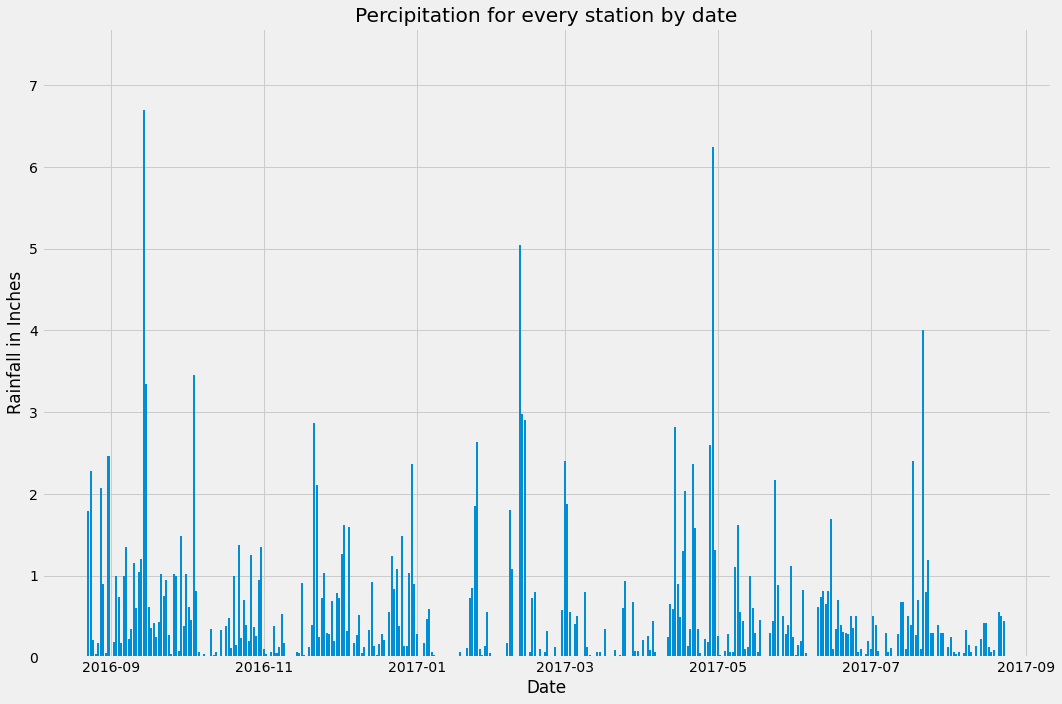

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,10))

plt.bar(df.index, df.rainfall, align="center")
#plt.xticks(gcf().autofmt_xdate())

plt.ylim(0, max(df.rainfall)+1)


plt.title("Percipitation for every station by date")
plt.xlabel("Date")
plt.ylabel("Rainfall in Inches")

plt.tight_layout()

plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,rainfall
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count()).\
    order_by(func.count().desc()).\
    group_by(Measurement.station).\
    all()

for stations, count in station_counts:
    print(stations, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
print(f'The max Temp at station USC00519281 was {max_temp[0]}')

min_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
print(f'The min Temp at station USC00519281 was {min_temp[0]}')

avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
print(f'The average Temp at station USC00519281 was {avg_temp[0]}')

The max Temp at station USC00519281 was (85.0,)
The min Temp at station USC00519281 was (54.0,)
The average Temp at station USC00519281 was (71.66378066378067,)


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps=session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.station=='USC00519281').\
filter(Measurement.date >= query_date).all()

temp_df = pd.DataFrame(station_temps, columns=['date', 'temperatures'])
temp_df['date'] =pd.to_datetime(temp_df.date)
temp_df.set_index('date', inplace=True)
temp_df.sort_index(inplace=True)
temp_df.head()

,temperatures
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


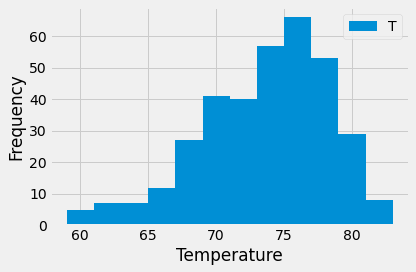

In [18]:
plt.hist(temp_df,bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(labels='Temps',loc=0)
plt.tight_layout()

plt.show()

# Close session

In [19]:
# Close Session
session.close()